# Linear Regression: Boston Housing Dataset

In [204]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

## Load Data From SciKit Learn

In [205]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [206]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


We need to take a look at the data

In [207]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [208]:
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
data['MEDV'] = dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/home/foster_jake/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


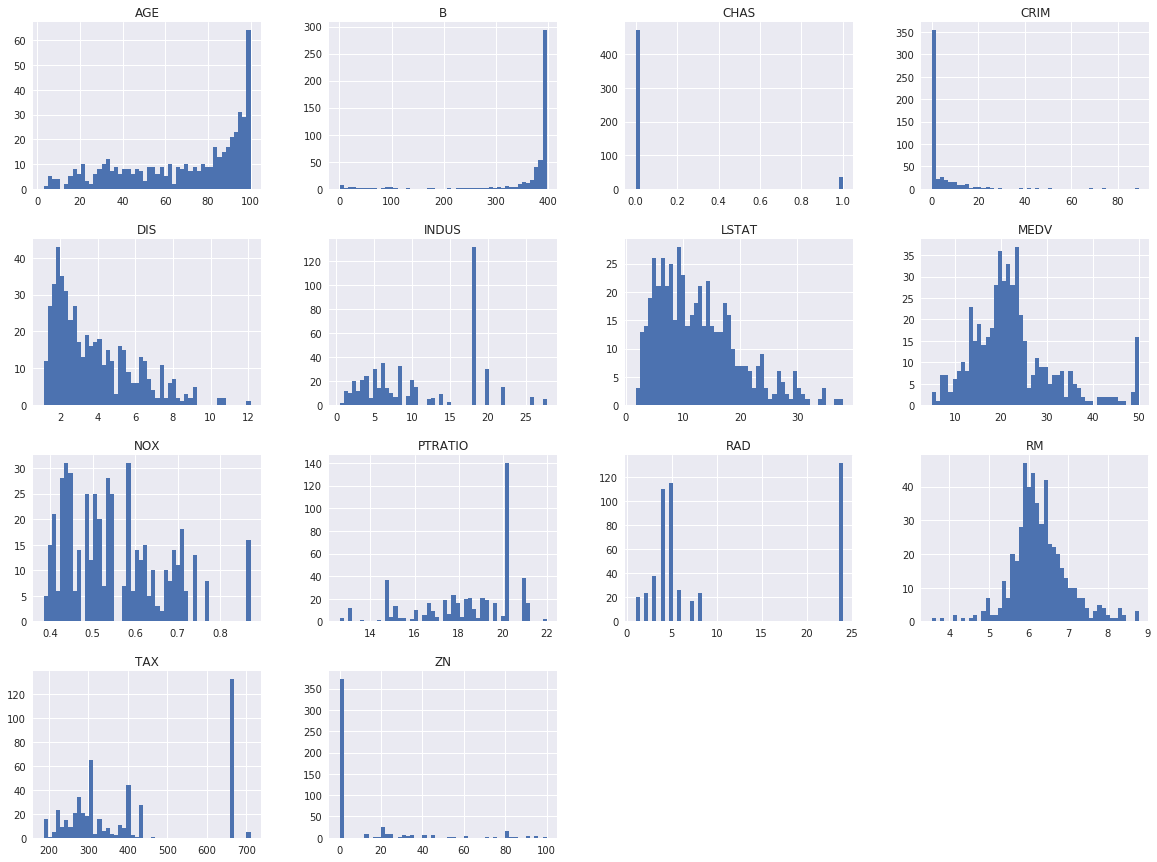

In [209]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Take a closer look at MEDV. It appears to me normally distribuited for the most part

/home/foster_jake/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


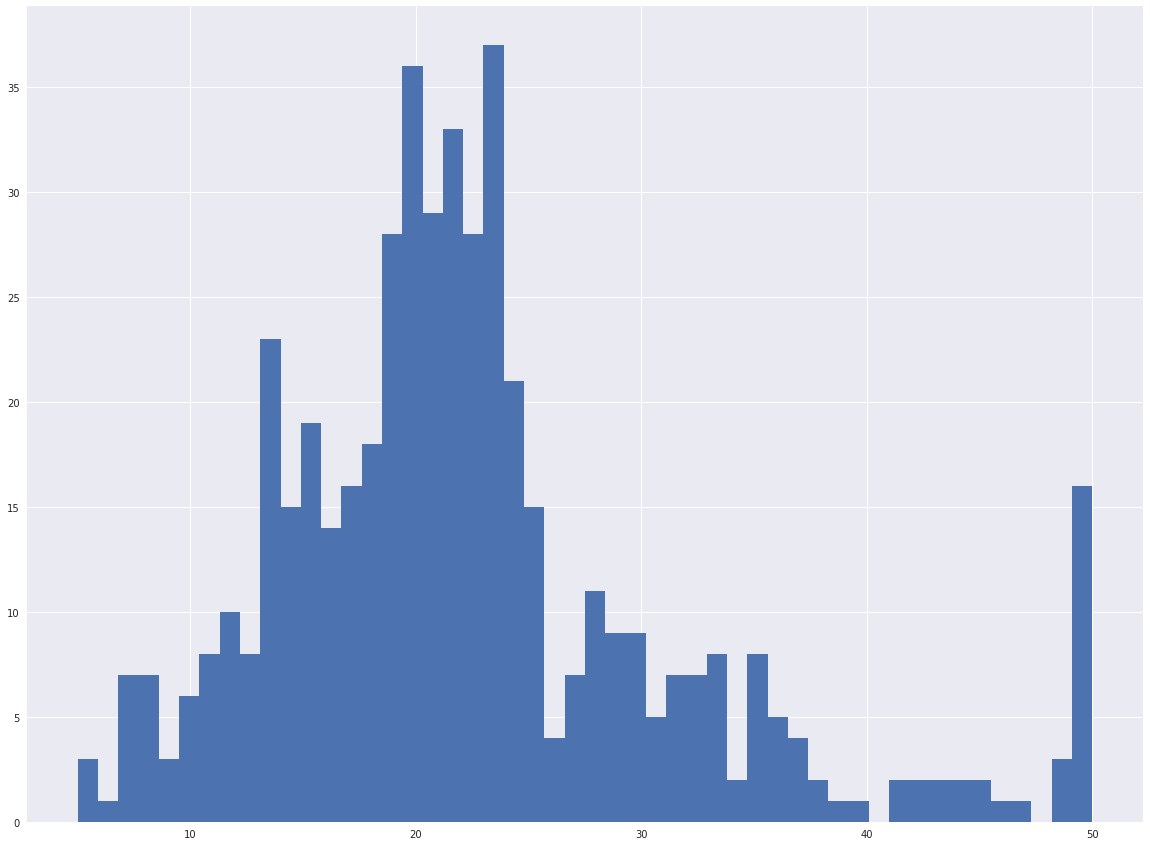

In [210]:
data['MEDV'].hist(bins=50, figsize=(20,15))
plt.show()

Now lets look at which attributes are strongly correlated with MEDV

In [211]:
corr_matrix = data.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

RM seems to be very positively correlated and LSTAT seems to be very negatively correlated. Let's take a closer look at them in regards to MEDV

In [212]:
RM_vs_MEDV = data[['RM', 'MEDV']]
LSTAT_vs_MEDV = data[['LSTAT', 'MEDV']]

/home/foster_jake/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


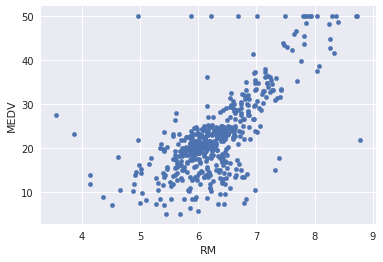

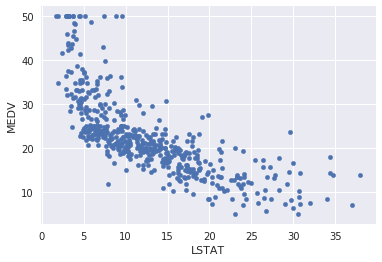

In [213]:
RM_vs_MEDV.plot(kind="scatter", x="RM", y="MEDV")
LSTAT_vs_MEDV.plot(kind="scatter", x="LSTAT", y="MEDV")

Our assumption was correct, so we will use these as our attributes.

We can now move towards training our dataset!

In [214]:
x_data = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns = ['LSTAT','RM'])
y_data = data['MEDV']

Now split our data for training and testing

In [215]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                    test_size = 0.2, random_state=5)

Now we can fit our linear regression model using the normal equation

In [216]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(2.7362403426066173, array([-0.71722954,  4.58938833]))

Let's take a look at our MSE and RMSE values to check the validity of this model.

In [217]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict

predictions = lin_reg.predict(x_train)

mse = mean_squared_error(y_train, predictions)
rmse = np.sqrt(mse)

cross = cross_val_score(lin_reg, x_train, y_train,
                         cv=10)

cross_pred = cross_val_predict(lin_reg, x_train, y_train, cv=10)

accuracy = r2_score(y_train, cross_pred)

print("Train MSE: ", mse)
print("Train RMSE: ", rmse)
print()
print("Corss Mean: ", cross.mean())
print("Cross Max: ", cross.max())
print("Accuracy: ", accuracy)

predictions = lin_reg.predict(x_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

cross = cross_val_score(lin_reg, x_test, y_test,
                         cv=10)

cross_pred = cross_val_predict(lin_reg, x_test, y_test, cv=10)

accuracy = r2_score(y_test, cross_pred)

print()
print("Test MSE: ", mse)
print("Test RMSE: ", rmse)
print()
print("Corss Mean: ", cross.mean())
print("Cross Max: ", cross.max())
print("Accuracy: ", accuracy)

Train MSE:  31.777227140320214
Train RMSE:  5.6371293350711955

Corss Mean:  0.613084566055973
Cross Max:  0.7484080066817016
Accuracy:  0.6194494928599593

Test MSE:  26.392886822666085
Test RMSE:  5.137400784702911

Corss Mean:  0.6728690256241756
Cross Max:  0.8942507904551846
Accuracy:  0.7084130817284298


These are looking really good, but lets try some Gradient Descent Algorithms to see if we can make it even better.

We will start wit a Stochastic Gradient Descent

In [218]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(x_train, y_train.ravel())

sgd_reg.intercept_, sgd_reg.coef_

/home/foster_jake/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([-1.4219537e+09]), array([1.88971492e+10, 2.03444366e+10]))

In [219]:
sgd_pred = sgd_reg.predict(x_train)

mse = mean_squared_error(y_train, sgd_pred)
rmse = np.sqrt(mse)

print("Train MSE: ", mse)
print("Train RMSE: ", rmse)

sgd_pred = sgd_reg.predict(x_test)

mse = mean_squared_error(y_test, sgd_pred)
rmse = np.sqrt(mse)

print()
print("Test MSE: ", mse)
print("Test RMSE: ", rmse)

Train MSE:  1.469421849979823e+23
Train RMSE:  383330386217.92334

Test MSE:  1.603058484831928e+23
Test RMSE:  400382128076.6573


We appear to be moving in the wrong direction (by a lot!), so let's try a grid search to better our model

In [220]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}

clf = GridSearchCV(sgd_reg, param_grid)
clf.fit(x_train, y_train)

/home/foster_jake/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/foster_jake/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/foster_jake/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/foster_jake/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instea

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'loss': ['squared_loss', 'huber', 'epsilon_insensitive'], 'penalty': ['l2', 'l1', 'elasticnet'], 'learning_rate': ['constant', 'optimal', 'invscaling']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [221]:
clf.best_params_

{'alpha': 0.01,
 'learning_rate': 'invscaling',
 'loss': 'huber',
 'penalty': 'l1'}

In [222]:
sgd_reg = SGDRegressor(**clf.best_params_)
sgd_reg.fit(x_train, y_train.ravel())

sgd_reg.intercept_, sgd_reg.coef_

/home/foster_jake/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


(array([0.2036504]), array([0.73519441, 1.31162261]))

In [223]:
sgd_pred = sgd_reg.predict(x_train)

mse = mean_squared_error(y_train, sgd_pred)
rmse = np.sqrt(mse)

print("Train MSE: ", mse)
print("Train RMSE: ", rmse)

sgd_pred = sgd_reg.predict(x_test)

mse = mean_squared_error(y_test, sgd_pred)
rmse = np.sqrt(mse)

print()
print("Test MSE: ", mse)
print("Test RMSE: ", rmse)

Train MSE:  193.30896522200703
Train RMSE:  13.903559444329607

Test MSE:  172.24551790927762
Test RMSE:  13.124233993238525


We're doing much better, but not as well as the normal equation, so let's do a grid search on that one.

In [224]:
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False],
              'copy_X':[True, False]}
clf = GridSearchCV(lin_reg, param_grid)
clf.fit(x_train, y_train)

/home/foster_jake/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [225]:
lin_reg = LinearRegression(**clf.best_params_)
lin_reg.fit(x_train, y_train)

predictions = lin_reg.predict(x_train)

mse = mean_squared_error(y_train, predictions)
rmse = np.sqrt(mse)

cross = cross_val_score(lin_reg, x_train, y_train,
                         cv=10)

cross_pred = cross_val_predict(lin_reg, x_train, y_train, cv=10)

accuracy = r2_score(y_train, cross_pred)

print("Train MSE: ", mse)
print("Train RMSE: ", rmse)
print()
print("Corss Mean: ", cross.mean())
print("Cross Max: ", cross.max())
print("Accuracy: ", accuracy)

predictions = lin_reg.predict(x_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

cross = cross_val_score(lin_reg, x_test, y_test,
                         cv=10)

cross_pred = cross_val_predict(lin_reg, x_test, y_test, cv=10)

accuracy = r2_score(y_test, cross_pred)

print()
print("Test MSE: ", mse)
print("Test RMSE: ", rmse)
print()
print("Corss Mean: ", cross.mean())
print("Cross Max: ", cross.max())
print("Accuracy: ", accuracy)

Train MSE:  31.824392981761832
Train RMSE:  5.641311282118886

Corss Mean:  0.6180133419000954
Cross Max:  0.7557479698940301
Accuracy:  0.6237721513267804

Test MSE:  25.777903837006782
Test RMSE:  5.077194484851529

Corss Mean:  0.6359287770657605
Cross Max:  0.8145817592713245
Accuracy:  0.6737172731674527


We have achieved basically the exact same results as the previous normal equation model. Maybe our data needs to be normalized.

In [226]:
from sklearn.preprocessing import StandardScaler

cols_to_norm = ['LSTAT', 'RM']
x_data[cols_to_norm] = StandardScaler().fit_transform(x_data[cols_to_norm])

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                    test_size = 0.2, random_state=5)

In [227]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

predictions = lin_reg.predict(x_train)

mse = mean_squared_error(y_train, predictions)
rmse = np.sqrt(mse)

cross = cross_val_score(lin_reg, x_train, y_train,
                         cv=10)

cross_pred = cross_val_predict(lin_reg, x_train, y_train, cv=10)

accuracy = r2_score(y_train, cross_pred)

print("Train MSE: ", mse)
print("Train RMSE: ", rmse)
print()
print("Corss Mean: ", cross.mean())
print("Cross Max: ", cross.max())
print("Accuracy: ", accuracy)

predictions = lin_reg.predict(x_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

cross = cross_val_score(lin_reg, x_test, y_test,
                         cv=10)

cross_pred = cross_val_predict(lin_reg, x_test, y_test, cv=10)

accuracy = r2_score(y_test, cross_pred)

print()
print("Test MSE: ", mse)
print("Test RMSE: ", rmse)
print()
print("Corss Mean: ", cross.mean())
print("Cross Max: ", cross.max())
print("Accuracy: ", accuracy)

Train MSE:  31.777227140320218
Train RMSE:  5.6371293350711955

Corss Mean:  0.6130845660559731
Cross Max:  0.7484080066817018
Accuracy:  0.6194494928599593

Test MSE:  26.392886822666096
Test RMSE:  5.137400784702912

Corss Mean:  0.6728690256241756
Cross Max:  0.8942507904551846
Accuracy:  0.7084130817284299
